>[Laboratorio metodos computacionales,](#scrollTo=RVd8FIMYJx14)

>[Interpolacion](#scrollTo=RVd8FIMYJx14)

>[Movimiento de proyectiles en presencia de viento.](#scrollTo=UYQFyalL4Kkl)

>[Generalizacion](#scrollTo=STxIakWfku92)

>[2.0  Interpolación lagrange](#scrollTo=AqZSU8CE46S9)

>[Interpolación Hermite](#scrollTo=FtPTTb5SNo5d)

>[Spline Cúbico](#scrollTo=ZOjIQYy3QEfG)

>[5.0 Ejercicios de Repaso](#scrollTo=l52RKNe3rczU)



<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Laboratorios_Taller/Lab07_interpolacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Laboratorio metodos computacionales, 
# Interpolacion





# 1. Movimiento de proyectiles en presencia de viento.

Supongamos que un proyectil es lanzado desde el origen con una rapidez $v=vo( \cos \theta , \sin \theta) $. Supongamos además que el efecto del viento sobre el proyectil es el de una fuerza proporcional a la velocidad relativa entre el viento y el proyectil. Teniendo presente que si $u$ es la velocidad del viento y $\alpha$ el ángulo que hace dirección de esta velocidad con el eje x, se puede entrontrar las siguientes ecuaciones diferenciales, asociada al estado de movimiento del [proyectil](https://iopscience.iop.org/article/10.1088/0143-0807/36/2/025016/meta):


\begin{equation}
m\frac{dv_x}{dt} = -mb(v_x-u\cos \alpha )
\end{equation}

\begin{equation}
m\frac{dv_y}{dt} = -mg-mb(v_x-u\sin \alpha ),
\end{equation}

donde b es el párametro de rozamiento. La soluciones a las ecuaciones anteriores vienen dadas por:

Posición en x
\begin{equation}
x=(u\cos \alpha) t + \frac{1}{b} (v_0\cos \theta_0 -u \cos\alpha)(1-\mathrm{exp}(-bt))
\end{equation}

Posicion en y 
\begin{equation}
y= \frac{1}{b}\left(\frac{g}{b}+v_0 \sin \theta_0 -u\sin\alpha \right)(1-\mathrm{exp}(-bt))-\left( \frac{g}{b}-u\sin\alpha\right)t
\end{equation}

Ver imagen:  http://www.sc.ehu.es/sbweb/fisica3/fluidos/viento/parabolico.html


0. Establezca las siguietnes condiciones inciales.

```
#Parametros iniciales

v0 = 60 #Velocidad en m/s
alpha = np.pi #Angulo del viento
theta = np.deg2rad(45) #Angulo de lanzamiento
u = v0/2             #rapidez del viento
b = 0.05             #Parametro de friccion 
g = 9.8                #Aceleracion de la gravedad m/s2

Params = (alpha, v0, b, u,g)  #Parametros en tupla.

```



1. Defina dos funciones, una para x y otra para y. 

```

#Posicion en x
def pos_x(t, theta, alpha, v0, b, u,g):
  x = #escriba aca la expresión
  return x

#Posicion en y
def pos_y(t, theta, alpha, v0, b, u,g):


  y = #escriba aca la expresión
  return y 

```

2. Construya un diccionario con las claves "X", "Y", "Tiempo"

3. Con el diccionario construya un data frame de pandas llamado df con los nombres de columnas "X", "Y", "Tiempo"  https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.from_dict.html. Defina 1000 registros para el intervalo de tiempo elegido.


4. Realice un gráfico de x como función del tiempo, de y como función del tiempo y la trayectoria de la partícula (df["X"], df["tiempo"], df["Y"]).


5. Determine el alcance máximo de la partícula, para ello tome  la solucion teórica con $y=0$, solucione numéricamente la ecuación para t y remplace este valor en la ecuación para x. Resuelvalo para $\theta=45^{o}$.  

6. Construya una  grafica del alcance máximo R como función de $\theta$, varie $\theta$  entre 10 y 90 grados cada 5 grados.













Posición en x
\begin{equation}
x=(u\cos \alpha) t + \frac{1}{b} (v_0\cos \theta_0 -u \cos\alpha)(1-\mathrm{exp}(-bt))
\end{equation}

Posicion en y 
\begin{equation}
y= \frac{1}{b}\left(\frac{g}{b}+v_0 \sin \theta_0 -u\sin\alpha \right)(1-\mathrm{exp}(-bt))-\left( \frac{g}{b}-u\sin\alpha\right)t
\end{equation}

In [96]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
from scipy.optimize import newton
from scipy.interpolate import lagrange

In [97]:
vo = 60 #Velocidad en m/s
alpha = np.pi #Angulo del viento
theta = np.deg2rad(45) #Angulo de lanzamiento
u = vo/2             #rapidez del viento
b = 0.05             #Parametro de friccion 
g = 9.8                #Aceleracion de la gravedad m/s2

def pos_x(t, vo, theta0, u, alpha, b, g  ):
  t1 = u*np.cos(alpha)*t  
  t2 = 1./b*(vo*np.cos(theta0)-u*np.cos(alpha))  
  t3 = (1-np.exp(-b*t))
  return t1 + t2 * t3


def pos_y(t, vo, theta0, u, alpha, b, g  ):
  t1 = (g/b + vo*np.sin(theta0) - u* np.sin(alpha) )
  t2 = (1-np.exp(-b*t)) 
  t3 = (g/b - u*np.sin(alpha))*t 
  return 1./b * t1 * t2 - t3

In [98]:
t = np.linspace(0, 8.5, 100)
Params = (vo, theta, u, alpha, b , g)  #Parametros en tupla.
x = pos_x(t, *Params)
y = pos_y(t, *Params)

In [99]:
dicc = {"x":x,"y":y ,"t":t}     #en x quedan almacenados todos lo valores de pos_x y en y todos los de pos_y como arrays
df = pd.DataFrame(dicc)

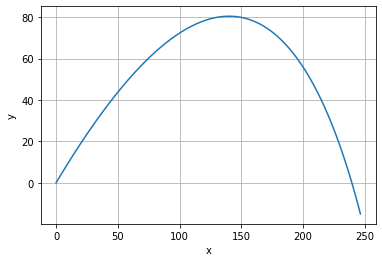

In [100]:
plt.plot(df.x, df.y)           #al escribir df.x y df.y se accede a las columnas df['x'], df['y']
plt.xlabel("x")
plt.ylabel("y")
plt.grid()

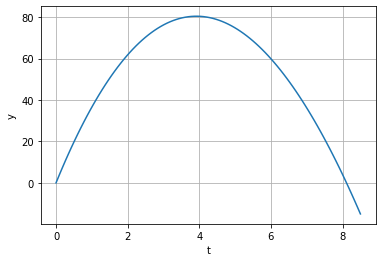

In [101]:
plt.plot(df.t, df.y)
plt.xlabel("t")
plt.ylabel("y")
plt.grid()

In [102]:
tv = newton(pos_y, 6.5, args=Params)       #recordamos también que con el método de newton solo es necesario pasar un punto y la funcion a la cual se le quieren encontrar los ceros
tv

8.111627022095584

In [103]:
pos_x(tv, *Params)

239.60614945520726

# Generalizacion

In [104]:
np.arange(5, 85, 5)

array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80])

In [105]:
theta = np.deg2rad(np.arange(5, 80, 5)) #Angulo de lanzamiento
theta

array([0.08726646, 0.17453293, 0.26179939, 0.34906585, 0.43633231,
       0.52359878, 0.61086524, 0.6981317 , 0.78539816, 0.87266463,
       0.95993109, 1.04719755, 1.13446401, 1.22173048, 1.30899694])

In [106]:
Rmax = np.zeros(len(theta))
for i, te in enumerate(theta):
  Params = (vo, te, u, alpha, b , g)  #Parametros en tupla.
  tv = newton(pos_y, 6.5, args = Params)                       #todos se analizan con respecto al punto 6.5
  Rmax[i] = pos_x(tv, *Params)
  #print(tv,pos_x(tv, *Params))

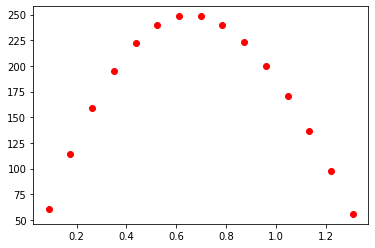

In [107]:
# Alcance maximo como funcion de theta
plt.plot(theta, Rmax,"ro" )

7. Realice una interpolacion de R como función de theta.

In [108]:
from scipy import interpolate

pol = interpolate.CubicSpline(theta, Rmax)

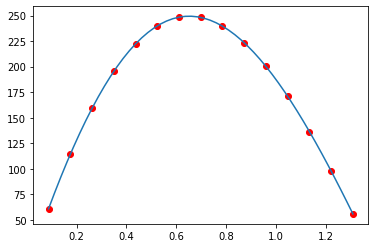

In [109]:
plt.plot(theta, Rmax,"ro" )
x = np.linspace(min(theta), max(theta))

plt.plot(x, pol(x))




# 2.0  Interpolación lagrange

Consideremos la función: 
\begin{equation*}
     f(x) = \frac{1}{1+25x^2}
\end{equation*}
en el intervalo $[-1, 1]$, definamos un conjunto de puntos $n+1$  equiespaciados en $[-1,1]$.


In [110]:
'''#Ayuda: 

import sympy as sp # Cargamos sympy como sp
import numpy as np
import matplotlib.pylab as plt

f_s = lambda x: 1/(1+25*x**2)
sp.init_printing()                  # Usar LaTeX para dibujar ecuaciones

x = sp.symbols("x") # x será una variable simbólica
f_s(x)
print(sp.diff(f_s(x),x))
print(sp.diff(f_s(x),x, 1))
print(sp.diff(f_s(x),x, 2))
print(sp.diff(f_s(x),x, 3))
print(sp.diff(f_s(x),x, 4))
print(sp.diff(f_s(x),x, 5))
f5 = sp.diff(f_s(x),x, 5)
fxn5 = sp.lambdify(x,f5,'numpy') #numpy funcion

x_ = np.linspace(-1, 1, 100)

plt.figure()
plt.plot(x_, fxn5(x_) )
plt.show()''';

In [111]:
import sympy as sp 
import numpy as np
import matplotlib.pylab as plt
from scipy import interpolate
import math

f_s = lambda x: 1/(1+25*x**2)

1. Representar gráficamente la función junto al polinomio de interpolación de Lagrange, $p_n(x)$, para $n=\{ 4, 8, 12, 16, 20 \}$. 

In [112]:
intervalos= []

n= np.array([4,8,12,16,20])

count = 0 
for i in n:
  intervalos.append(np.linspace(-1,1, i+1))
  count += 1

intervalos, len(intervalos[-1])

([array([-1. , -0.5,  0. ,  0.5,  1. ]),
  array([-1.  , -0.75, -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ]),
  array([-1.        , -0.83333333, -0.66666667, -0.5       , -0.33333333,
         -0.16666667,  0.        ,  0.16666667,  0.33333333,  0.5       ,
          0.66666667,  0.83333333,  1.        ]),
  array([-1.   , -0.875, -0.75 , -0.625, -0.5  , -0.375, -0.25 , -0.125,
          0.   ,  0.125,  0.25 ,  0.375,  0.5  ,  0.625,  0.75 ,  0.875,
          1.   ]),
  array([-1. , -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ,
          0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ])],
 21)

In [113]:
#vamos a aplicar la funcion a los puntos para realizar la interpolacion

apl_funcion = []

for i in intervalos:
  apl_funcion.append(f_s(i))

In [114]:
apl_funcion

[array([0.03846154, 0.13793103, 1.        , 0.13793103, 0.03846154]),
 array([0.03846154, 0.06639004, 0.13793103, 0.3902439 , 1.        ,
        0.3902439 , 0.13793103, 0.06639004, 0.03846154]),
 array([0.03846154, 0.05446293, 0.08256881, 0.13793103, 0.26470588,
        0.59016393, 1.        , 0.59016393, 0.26470588, 0.13793103,
        0.08256881, 0.05446293, 0.03846154]),
 array([0.03846154, 0.04965089, 0.06639004, 0.09288824, 0.13793103,
        0.22145329, 0.3902439 , 0.71910112, 1.        , 0.71910112,
        0.3902439 , 0.22145329, 0.13793103, 0.09288824, 0.06639004,
        0.04965089, 0.03846154]),
 array([0.03846154, 0.04705882, 0.05882353, 0.0754717 , 0.1       ,
        0.13793103, 0.2       , 0.30769231, 0.5       , 0.8       ,
        1.        , 0.8       , 0.5       , 0.30769231, 0.2       ,
        0.13793103, 0.1       , 0.0754717 , 0.05882353, 0.04705882,
        0.03846154])]

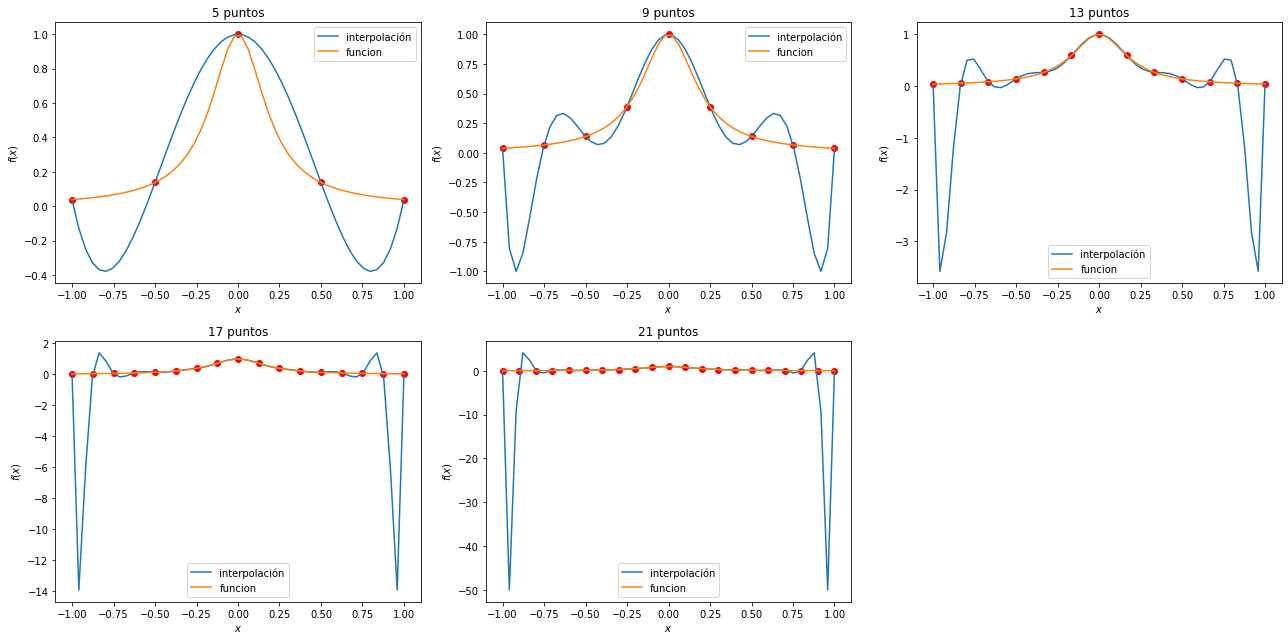

In [115]:
#analizamos el comportamiento para 20 puntos


plt.figure(figsize=(18, 9))


count= 0 
for i in intervalos[:]:
  plt.subplot(2, 3, count+1)
  plt.plot(intervalos[count], apl_funcion[count], 'ro')                      #pongo los puntos que necesito para cada uno de los casos
  
  pol =  interpolate.lagrange(intervalos[count], apl_funcion[count])         #genero el polinomio de interpolacion para los puntos en cada uno de los casos del for 
  x= np.linspace(min(intervalos[count]), max(intervalos[count]))
  plt.plot(x, pol(x), label = 'interpolación')                               #grafico el polinomio de interpolacion en cada uno de los casos
  
  x_ = np.linspace(-1, 1)
  plt.plot(x_, f_s(x_), label='funcion') 
  
  plt.title(f'{len(i)} puntos')                                    #realizo la gráfica de la función esperada
  plt.legend(loc = 'best')
  plt.xlabel('$x$')
  plt.ylabel('$f(x)$')
  count += 1

plt.tight_layout();

 2. Comprobar gráficamente cómo el error aumenta con $n$. Emplee la libreria, simbolica de sympy y encuente el error en la interpolación.
 
Para este numeral, emplee que: 
 
 
La cota del  error , viene dado por: 
\begin{equation}
f(x) - P(x) = \epsilon = \frac{1}{(n+1)!} f^{(n+1)}(\xi)(x - x_0)(x - x_1) ... (x - x_n)
\end{equation}, emplee la libreria simbolica para realizar la estimación de dicha cuota, sólo para n = 4, en el punto 0.5 (para todos los x)

donde $f^{(n+1)}(\xi)$ es el máximo de la n+1 derivada

In [116]:
#comenzamos por calcular la n+1 derivada de la funcion

#n= np.array([4,8,12,16,20])

polinomios=[]            #almaceno los polinomios de interpolacion para cada uno de los casos que me piden
for i in range(5):
  polinomios.append(interpolate.lagrange(intervalos[i], apl_funcion[i]))

In [117]:
f_s = lambda x: 1/(1+25*x**2)
x = sp.symbols("x")

derivadas = []         #almaceno las derivadas de los ordenes que necesito --> correspondientes al numero de puntos que tenga
derivadas_numpy = []   #las almaceno como un objeto de numpy, en el cual puedo evaluar valores
for i in range(5):
  derivadas.append(sp.diff(f_s(x),x,len(intervalos[i])))
  derivadas_numpy.append(sp.lambdify(x, derivadas[i], 'numpy'))

In [118]:
derivadas_numpy

[<function _lambdifygenerated(x)>,
 <function _lambdifygenerated(x)>,
 <function _lambdifygenerated(x)>,
 <function _lambdifygenerated(x)>,
 <function _lambdifygenerated(x)>]

In [119]:
xx = np.linspace(-1, 1)        #intervalos que sse consideraron para cada una de las gráficas

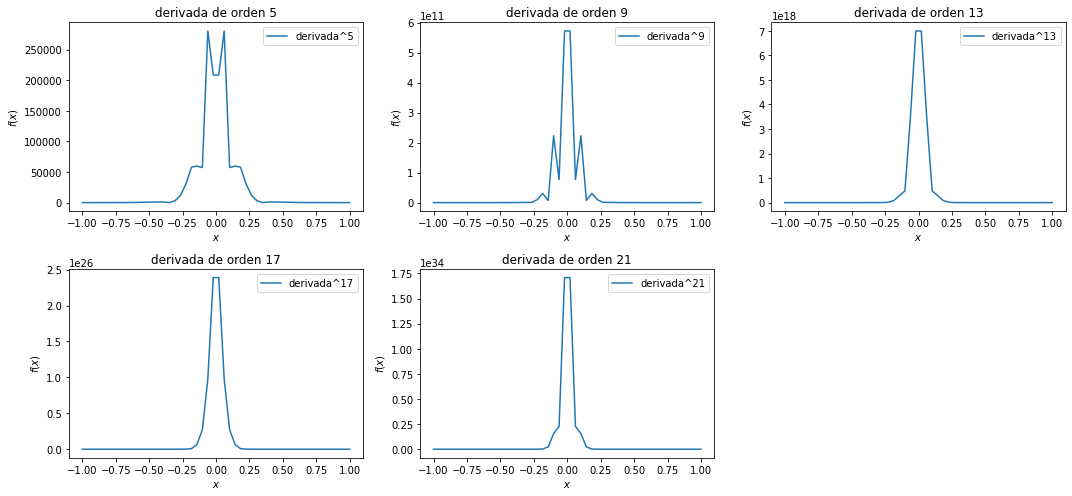

In [120]:
plt.figure(figsize=(15, 7))


count= 0 
for i in intervalos[:]:
  plt.subplot(2, 3, count+1)
  plt.plot(xx, abs(derivadas_numpy[count](xx)), label=f'derivada^{len(i)}')                      #pongo los puntos que necesito para cada uno de los casos
  
  plt.title(f'derivada de orden {len(i)}')                                    #realizo la gráfica de la función esperada
  plt.legend(loc = 'best')
  plt.xlabel('$x$')
  plt.ylabel('$f(x)$')
  count += 1

plt.tight_layout();

In [121]:
#recordamos que a lista intervalos, contiene los linspaces desde -1 hasta 1, con n+1 puntos
intervalos

[array([-1. , -0.5,  0. ,  0.5,  1. ]),
 array([-1.  , -0.75, -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ]),
 array([-1.        , -0.83333333, -0.66666667, -0.5       , -0.33333333,
        -0.16666667,  0.        ,  0.16666667,  0.33333333,  0.5       ,
         0.66666667,  0.83333333,  1.        ]),
 array([-1.   , -0.875, -0.75 , -0.625, -0.5  , -0.375, -0.25 , -0.125,
         0.   ,  0.125,  0.25 ,  0.375,  0.5  ,  0.625,  0.75 ,  0.875,
         1.   ]),
 array([-1. , -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ,
         0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ])]

In [122]:
#guardamos el máximo absoluto de cada una de las derivadas
max_der = []
xx = np.linspace(-1, 1)

for i in range(5):
  max_der.append(np.max(abs(derivadas_numpy[i](xx))))

max_der

[280238.95743385755,
 572349982970.3582,
 6.993277790560745e+18,
 2.3892913288009606e+26,
 1.7088130587343992e+34]

In [123]:
#calculo ahora los valores del factorial que necesito

fact = []

for i in range(5):
  fact.append(math.factorial(len(intervalos[i])))

fact

[120, 362880, 6227020800, 355687428096000, 51090942171709440000]

\begin{equation}
f(x) - P(x) = \epsilon = \frac{1}{(n+1)!} f^{(n+1)}(\xi)(x - x_0)(x - x_1) ... (x - x_n)
\end{equation}

In [124]:
#notamos que nos hace falta el término de la productoria para completar el resultado
#calculemos esto también por aparte
#recordamos que nuestros puntos x_i están almacenados en intervalos

productoria = []

for i in range(5):
  prod= 1
  for j in intervalos[i]:
    prod *= xx - j
  productoria.append(prod)

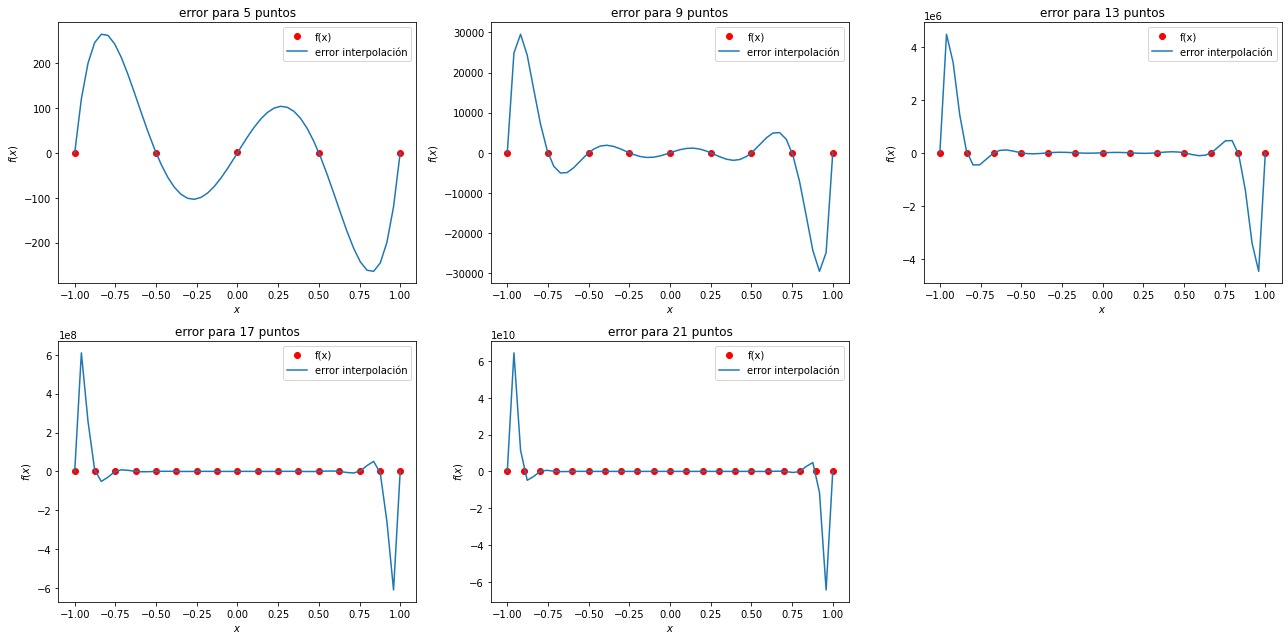

In [125]:
#realizo las operaciones que tengo, asegurandome de convertir (en un comienzo), todo lo que tengo en listas a vectores

max_derivada = np.array(max_der)
factorial = np.array(fact)
product = np.array(productoria)

plt.figure(figsize=(18, 9))


count= 0 
for i in intervalos[:]:
  plt.subplot(2, 3, count+1)
  plt.plot(intervalos[count], apl_funcion[count], 'ro', label = 'f(x)')                         #puntos de interpolacion
  
  plt.plot(xx, max_derivada[count] / factorial[count] * product[count], label= 'error interpolación')
  
  x_ = np.linspace(-1, 1)
  
  plt.title(f'error para {len(i)} puntos')                                    #realizo la gráfica de la función esperada
  plt.legend(loc = 'best')
  plt.xlabel('$x$')
  plt.ylabel('$f(x)$')
  count += 1

plt.tight_layout();


#3.  Interpolación Hermite

Consideremos la función: 
\begin{equation*}
     f(x) = \frac{1}{1+25x^2}
\end{equation*}
en el intervalo $[-1, 1]$, definamos un conjunto de puntos $n+1$  equiespaciados en $[-1,1]$.

 1. Representar gráficamente la función junto al polinomio de interpolación de Hermite, $p_n(x)$, para $n=\{ 4, 8, 12, 16, 20 \}$. 



In [126]:
from scipy import interpolate
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
import math

In [127]:
fun = lambda x: 1/(1+25*x**2)

In [128]:
x= sp.symbols('x')

der = sp.diff(fun(x), x)
deriv = sp.lambdify(x, der, 'numpy')

In [129]:
intervalos= []

n= np.array([4,8,12,16,20])

count = 0 
for i in n:
  intervalos.append(np.linspace(-1,1, i+1))
  count += 1


apl_funcion = []

for i in intervalos:
  apl_funcion.append(fun(i))

intervalos

[array([-1. , -0.5,  0. ,  0.5,  1. ]),
 array([-1.  , -0.75, -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ]),
 array([-1.        , -0.83333333, -0.66666667, -0.5       , -0.33333333,
        -0.16666667,  0.        ,  0.16666667,  0.33333333,  0.5       ,
         0.66666667,  0.83333333,  1.        ]),
 array([-1.   , -0.875, -0.75 , -0.625, -0.5  , -0.375, -0.25 , -0.125,
         0.   ,  0.125,  0.25 ,  0.375,  0.5  ,  0.625,  0.75 ,  0.875,
         1.   ]),
 array([-1. , -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ,
         0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ])]

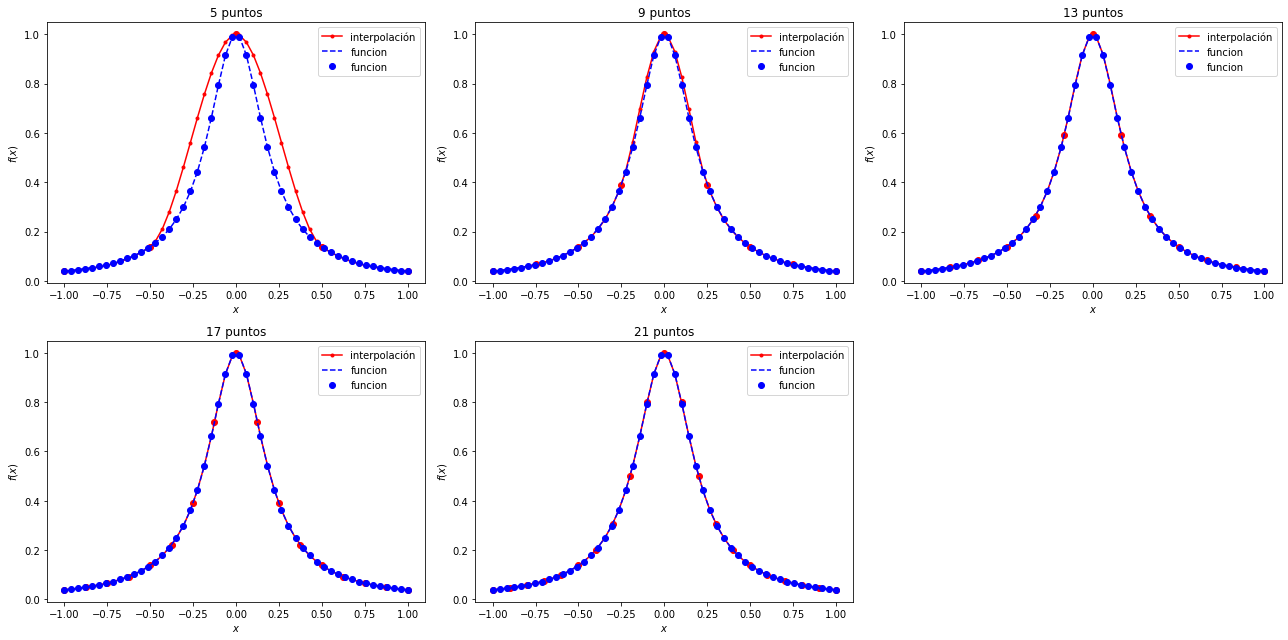

In [130]:
plt.figure(figsize=(18, 9))


count= 0 
for i in intervalos[:]:
  plt.subplot(2, 3, count+1)
  plt.plot(intervalos[count], apl_funcion[count], 'ro')                      #pongo los puntos que necesito para cada uno de los casos
  
  pol = interpolate.CubicHermiteSpline(intervalos[count], apl_funcion[count], deriv(intervalos[count]))
  x= np.linspace(min(intervalos[count]), max(intervalos[count]))
  plt.plot(x, pol(x), 'r.-', label = 'interpolación')                               #grafico el polinomio de interpolacion en cada uno de los casos
  
  x_ = np.linspace(-1, 1)
  plt.plot(x_, fun(x_), 'b--', label='funcion') 
  plt.plot(x_, fun(x_), 'bo' , label='funcion') 
  
  plt.title(f'{len(i)} puntos')                                    #realizo la gráfica de la función esperada
  plt.legend(loc = 'best')
  plt.xlabel('$x$')
  plt.ylabel('$f(x)$')
  count += 1

plt.tight_layout();

 2. Comprobar gráficamente cómo el error aumenta con $n$. Emplee la libreria, simbolica de sympy y encuente el error en la interpolación.
 
 Para este numeral, emplee que: 
 
 
La cota del  error , viene dado por: 

$$
  f(x)-p_{2n+1}(x)
  = \frac{f^{2n+2}(\xi)}{(2n+2)!} (x-x_0)^2(x-x_1)^2(x-x_2)^2,
$$





emplee la libreria simbolica para realizar la estimación de dicha cuota, sólo para n = 4, en el punto 0.5

In [131]:
polinomios=[]                                                                   #almaceno los polinomios de interpolacion para cada uno de los casos que me piden

for i in range(5):
  polinomios.append(interpolate.CubicHermiteSpline(intervalos[i], apl_funcion[i], deriv(intervalos[i])))


In [132]:
fun = lambda x: 1/(1+25*x**2)

In [133]:
x= sp.symbols('x')

derivadas = []                                                                  #almaceno las derivadas de los ordenes que necesito --> correspondientes al numero de puntos que tenga
derivadas_numpy = []                                                            #las almaceno como un objeto de numpy, en el cual puedo evaluar valores

n= np.array([4,8,12,16,20])

for i in range(5):
  derivadas.append(sp.diff(fun(x),x, n[i]+2))
  derivadas_numpy.append(sp.lambdify(x, derivadas[i], 'numpy'))

xx = np.linspace(-1, 1)  

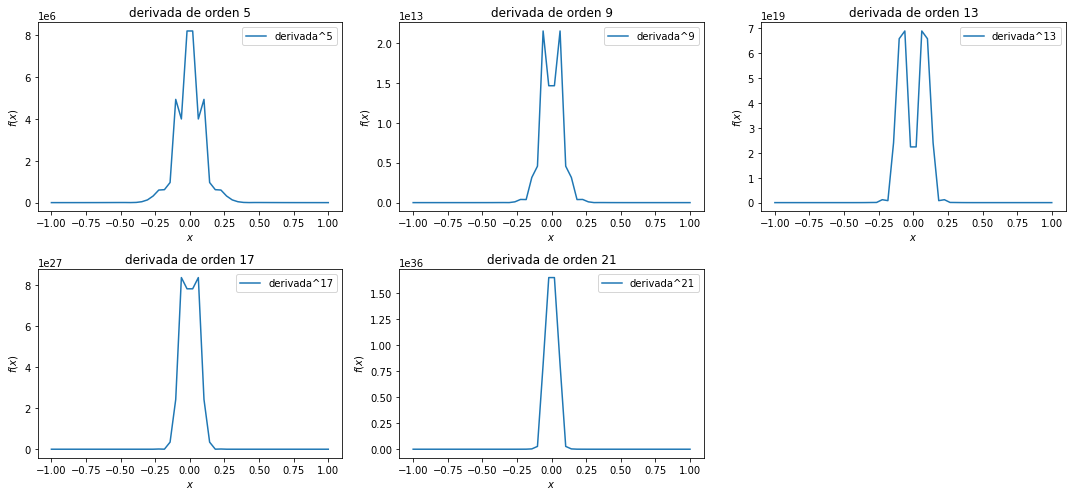

In [134]:
plt.figure(figsize=(15, 7))


count= 0 
for i in intervalos[:]:
  plt.subplot(2, 3, count+1)
  plt.plot(xx, abs(derivadas_numpy[count](xx)), label=f'derivada^{len(i)}')                      #pongo los puntos que necesito para cada uno de los casos     #en valor absoluto
  
  plt.title(f'derivada de orden {len(i)}')                                    #realizo la gráfica de la función esperada
  plt.legend(loc = 'best')
  plt.xlabel('$x$')
  plt.ylabel('$f(x)$')
  count += 1

plt.tight_layout();

In [135]:
#veamos ahora el máximo en cada una de las derivadas

max_der=[]

for i in range(5):
  max_der.append(np.max(abs(derivadas_numpy[i](xx))))
  max_der

In [136]:
n= np.array([4,8,12,16,20])

#veamos ahora los términos factoriales que necesitamos

fact = []

for i in range(5):
  fact.append(math.factorial(n[i] + 2))

fact

[720, 3628800, 87178291200, 6402373705728000, 1124000727777607680000]


$$
  f(x)-p_{2n+1}(x)
  = \frac{f^{2n+2}(\xi)}{(2n+2)!} (x-x_0)^2(x-x_1)^2(x-x_2)^2,
$$

las x son mis xx, y los x_0 hasta x_n son los puntos sobre los cuales evalue la derivada --> los puntos de rojito 

# 4. Spline Cúbico

Consideremos la imagen ![paloma](https://github.com/hernansalinas/autogrades/blob/main/Laboratorios_Taller/img/paloma.png?raw=true)




Con los datos dados en la tabla:


Ref: Metodos numericos, Burden.

1. Representar gráficamente la imagen, usando las órdenes `imread` e `imshow` de python (estas órdenes están contenidas en el paquete `matplotlib`) 

In [137]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

In [138]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [139]:
#muestro la imagen que tengo en la ruta de drive

import cv2
img = cv2.imread('/content/drive/MyDrive/Taller-métodos/Laboratorios/ave.png')

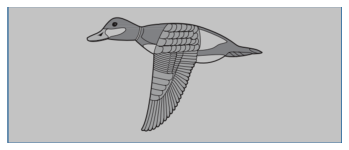

In [140]:
import matplotlib.pyplot as plt
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

2. Definir una lista de puntos, $x_i$,$y_i$ de la paloma.

In [141]:
x= np.array([0.9, 1.3, 1.9, 2.1, 2.6, 3, 3.9, 4.4, 4.7, 5.0, 6,  7.0, 8, 9.2, 10.5, 11.3, 11.6, 12, 12.6, 13, 13.3])
f_x = np.array([1.3, 1.5, 1.85, 2.1, 2.6, 2.7, 2.4, 2.15, 2.05, 2.1, 2.25, 2.3, 2.25, 1.95, 1.4, 0.9, 0.7, 0.6, 0.5, 0.4, 0.25])

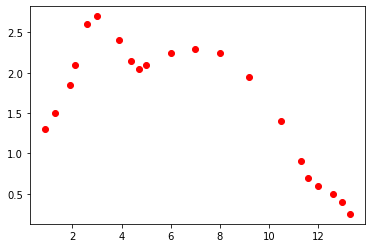

In [142]:
plt.plot(x, f_x, 'ro');

3. Representar el polinomio de interpolación de Lagrange en estos puntos, para aproximar el dibujo.

In [143]:
poly = interpolate.lagrange(x, f_x)
print(poly)

#observamos que obtenemos un polinomio de grado 20

            20             19             18             17
-3.075e-11 x  + 4.279e-09 x  - 2.773e-07 x  + 1.111e-05 x 
              16            15           14         13         12
 - 0.0003082 x  + 0.006286 x  - 0.09769 x  + 1.183 x  - 11.32 x 
          11         10        9        8             7             6
 + 86.25 x  - 525.8 x  + 2564 x - 9969 x + 3.068e+04 x - 7.387e+04 x
              5             4           3             2
 + 1.368e+05 x - 1.899e+05 x + 1.9e+05 x - 1.287e+05 x + 5.246e+04 x - 9653


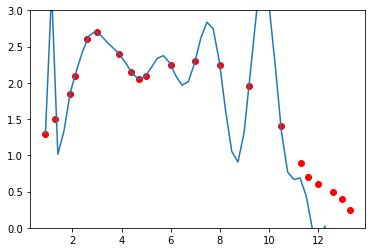

In [144]:
#cuando tomamos 50 puntos para evaluar en el polinomio en bísqueda de una mayor precisión obtenemos una gráfica con bastante oscilaciones

x_ = np.linspace(min(x), max(x))
y_ = poly(x_)
plt.plot(x, f_x, 'ro')
plt.ylim(0,3)

plt.plot(x_, y_)

correción: vamos a dividir la lista de puntos, para realizar la interpolacion por tamos, debido a que como el grado del polinomio es tan alto, es propenso a errores

In [145]:
x= np.array([0.9, 1.3, 1.9, 2.1, 2.6, 3, 3.9, 4.4, 4.7, 5.0, 6,  7.0, 8, 9.2, 10.5, 11.3, 11.6, 12, 12.6, 13, 13.3])
f_x = np.array([1.3, 1.5, 1.85, 2.1, 2.6, 2.7, 2.4, 2.15, 2.05, 2.1, 2.25, 2.3, 2.25, 1.95, 1.4, 0.9, 0.7, 0.6, 0.5, 0.4, 0.25])

len(x), len(f_x)

(21, 21)

In [146]:
x_1 = x[:8]
f_x_1 = f_x[:8]

x_2 = x[7:15]
f_x_2 = f_x[7:15]

x_3 = x[14:]
f_x_3 = f_x[14:]

In [147]:
#interpolaciones
poly_1 = interpolate.lagrange(x_1, f_x_1)
print(poly_1)

         7          6         5         4         3         2
0.03875 x - 0.7922 x + 6.709 x - 30.24 x + 77.52 x - 111.7 x + 83.68 x - 23.75


In [148]:
poly_2 = interpolate.lagrange(x_2, f_x_2)
print(poly_2)

           7           6         5         4         3         2
-0.001677 x + 0.08504 x - 1.825 x + 21.47 x - 149.7 x + 617.7 x - 1398 x + 1340


In [149]:
poly_3 = interpolate.lagrange(x_3, f_x_3)
print(poly_3)

         6         5         4        3             2
-0.1171 x + 8.532 x - 258.8 x + 4182 x - 3.797e+04 x + 1.836e+05 x - 3.695e+05


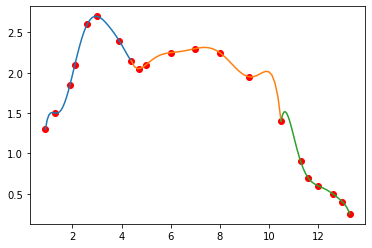

In [150]:
#graficamos

plt.figure()
x_primer = np.linspace(min(x_1), max(x_1))
y_primer = poly_1(x_primer)
plt.plot(x, f_x, 'ro')
plt.plot(x_primer, y_primer)

x_segundo = np.linspace(min(x_2), max(x_2))
y_segundo = poly_2(x_segundo)
plt.plot(x_segundo, y_segundo)

x_tercer = np.linspace(min(x_3), max(x_3))
y_tercer = poly_3(x_tercer)
plt.plot(x_tercer, y_tercer)

4. Repetir el proceso de interpolación mediante *splines* cúbicos. Para ello, utilizar la función `CubicSpline` (contenida en `scipy.interpolate`), 

In [151]:
#veamos ahora como se aproxima el dubujo cuando hacemos uso de los spline cúbicos
pol  = interpolate.CubicSpline(x, f_x)

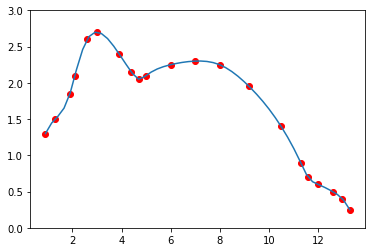

In [152]:
x_ = np.linspace(min(x), max(x))
y_ = pol(x_)
plt.plot(x, f_x, 'ro')
plt.ylim(0,3)

plt.plot(x_, y_)

5. Comparar los resultados. ¿Alguna de las interpolaciones presenta oscilaciones? ¿A qué se debe este fenómeno?

Notamos que en el caso de la interpolacion por medio de splines cúbicos no hay oscilaciones anómalas, y el contorno que se obtiene del ave es justo el que se espera.

Por otro lado, cuando usamos el método de interpolación de lagrange, obtenemos una gráfica que oscila bastante, y que como tal no es la esperada, puesto que no toma los últimos puntos.

Esto se debe a que los puntos no presentan un patrón particular, y a que tenemo un gran numero de pntos a interpolar. 

Como consecuencia de esto tenemos un polinomio de grado 20, lo cual será propenso a márgenes grandes de error.


# 5.0 Ejercicios de Repaso

 En la teoria de campo medio, La magnetización como función de la temperatura de un material magnético  puede ser calculada como:

\begin{equation}
m(T) = \tanh\left( \frac{m(T)}{T} \right)
\end{equation}

donde m y T son la magnetizacion y temperatura reducida respectivamente

Para T = 0.5, determine:




In [153]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from scipy import interpolate

In [154]:
#vamos a pasar m(T) hacia el lado izquierdo, para trabajar con esta funcion

def mag(m, T):
  return np.tanh(m/T) - m

#definimos m(T) = m

In [155]:
T= 0.5

Text(0.5, 0, 'mag')

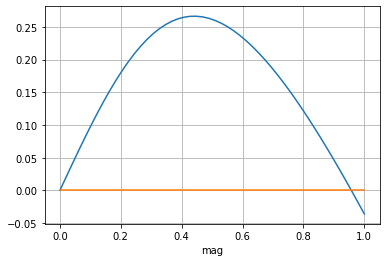

In [156]:
#realizamos una gráfica para tener una noción del valor de m que satisface la ecuacion

m= np.linspace(0, 1)
y= mag(m, T)
ceros= np.zeros(50)

plt.plot(m,y)
plt.plot(m, ceros)
plt.grid()
plt.xlabel('mag')

a. La magnetización reducida empleando el metodo de la secante(Muestre su resultado con 4 cifras)

In [157]:
x_0, x_1 = 0.8, 0.9

In [158]:
raiz = optimize.root_scalar(mag, args=(T), x0 = x_0, x1 =x_1).root
print(f'empleando el método de la secante, obtenemos que la magnetización reducida es de {raiz:.4f}')

empleando el método de la secante, obtenemos que la magnetización reducida es de 0.9575


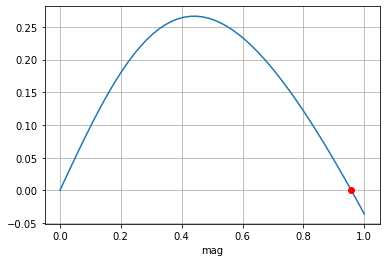

In [159]:
m= np.linspace(0, 1)
y= mag(m, T)

plt.plot(m,y)
plt.plot(raiz, mag(raiz, T), 'ro')
plt.grid()
plt.xlabel('mag');

b. Valide su respuestado con el metodo de punto fijo.
(Muestre su resultado con 4 cifras)

In [160]:
#definimos la funcion que usamos en el método del punto fijo

def fun(m,T):
  return m - mag(m,T)

In [161]:
raiz = optimize.fixed_point(fun, x_0, args=(T,))

In [162]:
print(f'empleando el método del punto fijo, obtenemos que la magnetización reducida es de {raiz:.4f}')

empleando el método del punto fijo, obtenemos que la magnetización reducida es de 0.9575


d. Defina T = np.linspace(0.1,0.99,100), y emple el metodo de la secante para construir un gráfico de magnetización reducida como función de la temperatura para los  100 valores  de T.

In [163]:
T = np.linspace(0.1,0.99,100)

In [164]:
m_r = np.zeros(100)

count=0
for i in T:
  raiz = optimize.root_scalar(mag, args=(i), x0 = 0.5, x1=0.6).root
  m_r[count] = raiz
  count +=1

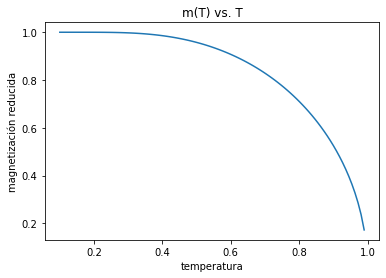

In [165]:
#observamos que conforme aumenta la temperatura, disminuye la magnetización reducida

plt.plot(T, m_r)
plt.xlabel('temperatura')
plt.ylabel('magnetización reducida')
plt.title('m(T) vs. T');

e. Para los 100 puntos anteriores, emplee el metodo de interpolación de lagrange y cubic-spline. Realizar una gráfica mostrando los puntos y el polinomio de interpolación para cada unos de los metodos. ¿Que puede concluir de los metodos?

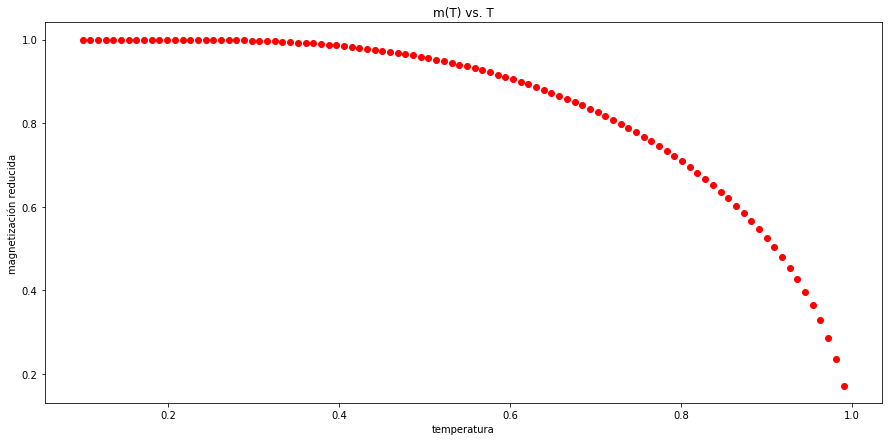

In [166]:
plt.figure(figsize=(15,7))
plt.plot(T, m_r, 'ro')
plt.xlabel('temperatura')
plt.ylabel('magnetización reducida')
plt.title('m(T) vs. T');

In [167]:
#veamos primero como es el polinomio correspondiente a la interpolacion de lagrange

poly = interpolate.lagrange(T, m_r)
print(poly)

            99             98             97             96
-1.772e+62 x  + 9.613e+63 x  - 2.541e+65 x  + 4.435e+66 x 
              95             94             93             92
 - 5.769e+67 x  + 5.916e+68 x  - 5.027e+69 x  + 3.573e+70 x 
              91             90             89             88
 - 2.192e+71 x  + 1.194e+72 x  - 5.733e+72 x  + 2.466e+73 x 
              87             86             85             84
 - 9.548e+73 x  + 3.358e+74 x  - 1.086e+75 x  + 3.244e+75 x 
              83             82             81             80
 - 8.982e+75 x  + 2.297e+76 x  - 5.436e+76 x  + 1.214e+77 x 
              79             78             77             76
 - 2.524e+77 x  + 4.897e+77 x  - 9.046e+77 x  + 1.554e+78 x 
              75             74             73             72
 - 2.542e+78 x  + 3.901e+78 x  - 5.658e+78 x  + 7.764e+78 x 
              71             70            69             68
 - 1.008e+79 x  + 1.253e+79 x  - 1.48e+79 x  + 1.649e+79 x 
              67      

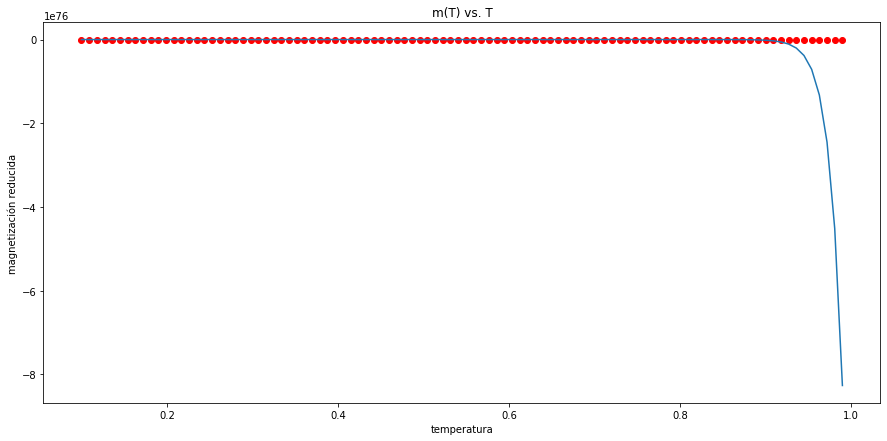

In [168]:
plt.figure(figsize=(15,7))
plt.plot(T, m_r, 'ro')
plt.plot(T, poly(T))                #pendiente revisar esto
plt.xlabel('temperatura')
plt.ylabel('magnetización reducida')
plt.title('m(T) vs. T');

In [169]:
#veamos ahora como queda la interpolación cuando lo acemos por medio de spline cúbico

pol = interpolate.CubicSpline(T, m_r)

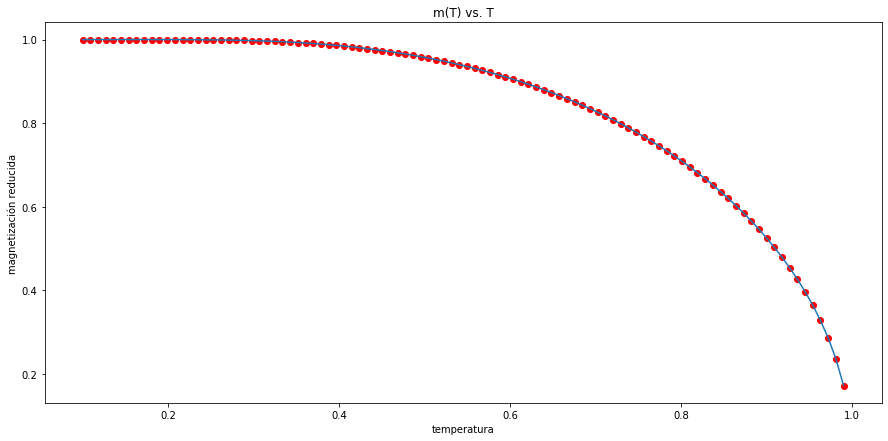

In [170]:
plt.figure(figsize=(15,7))
plt.plot(T, m_r, 'ro')
plt.plot(T, pol(T))                #pendiente revisar esto
plt.xlabel('temperatura')
plt.ylabel('magnetización reducida')
plt.title('m(T) vs. T');

Concluimos que con el método de splines cúbicos obtenemos un resultado que es casi exacto a lo que esperaríamos, es decir, la interpolación se hace de una forma efectiva, sin embargo, el método de Lagrange presenta bastantes errores, debido a que el poliomio que se genera es de grado muy alto
